In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

 
df=pd.read_csv("FAOSTAT_data.csv")
df.isnull().sum()
columns=['Note','Year Code','Area Code (M49)','Domain Code','Domain','Element Code','Item Code (CPC)','Flag','Flag Description']
df.drop(columns=columns,inplace=True)
df['Value'].fillna(df['Value'].median(),inplace=True)
df['Unit'].fillna(df['Unit'].mode()[0],inplace=True)
df.isnull().sum()


Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:

df.to_csv('cleaned_crop_data.csv', index=False)


EDA:
Analyze Crop Distribution
Crop Types: Study the distribution of the Item column to identify the most and least cultivated crops across regions.


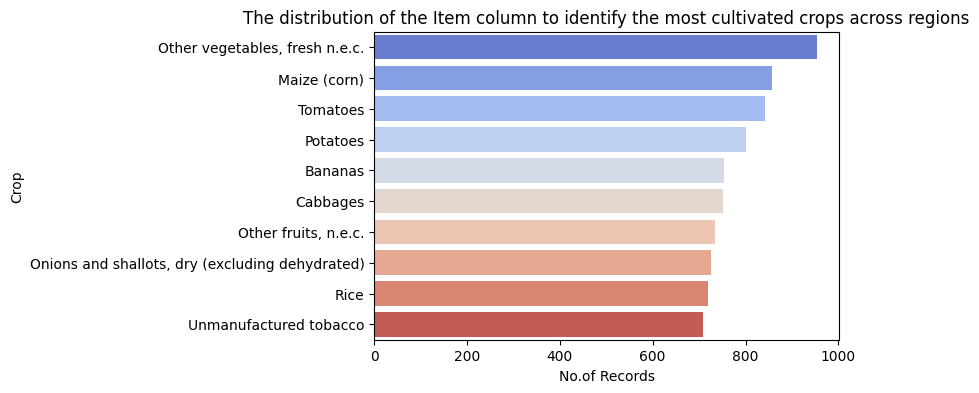

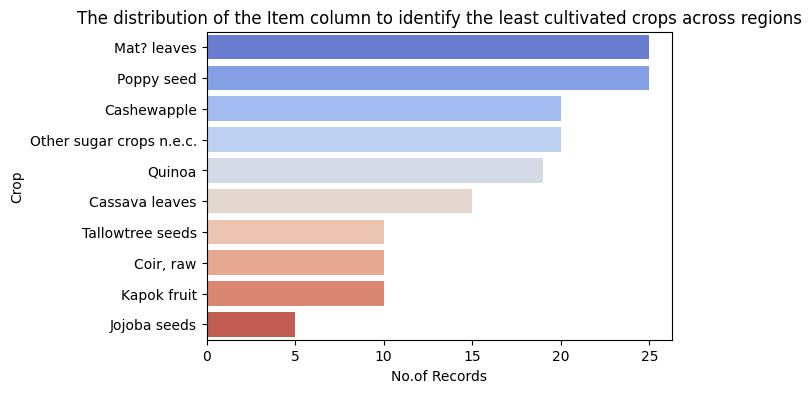

In [26]:
most_harvested=df[df['Element']=='Area harvested']['Item'].value_counts().head(10).reset_index()
least_harvested=df[df['Element']=='Area harvested']['Item'].value_counts().tail(10).reset_index()
most_harvested.columns=['Item','count']
least_harvested.columns=['Item','count']
plt.figure(figsize=(6,4))
plt.title("The distribution of the Item column to identify the most cultivated crops across regions")
sns.barplot(x='count',y='Item',data=most_harvested,palette='coolwarm')
plt.ylabel('Crop')
plt.xlabel('No.of Records')
plt.show()
plt.figure(figsize=(6,4))
plt.title("The distribution of the Item column to identify the least cultivated crops across regions")
sns.barplot(x='count',y='Item',data=least_harvested,palette='coolwarm')
plt.ylabel('Crop')
plt.xlabel('No.of Records')
plt.show()

b) Geographical Distribution


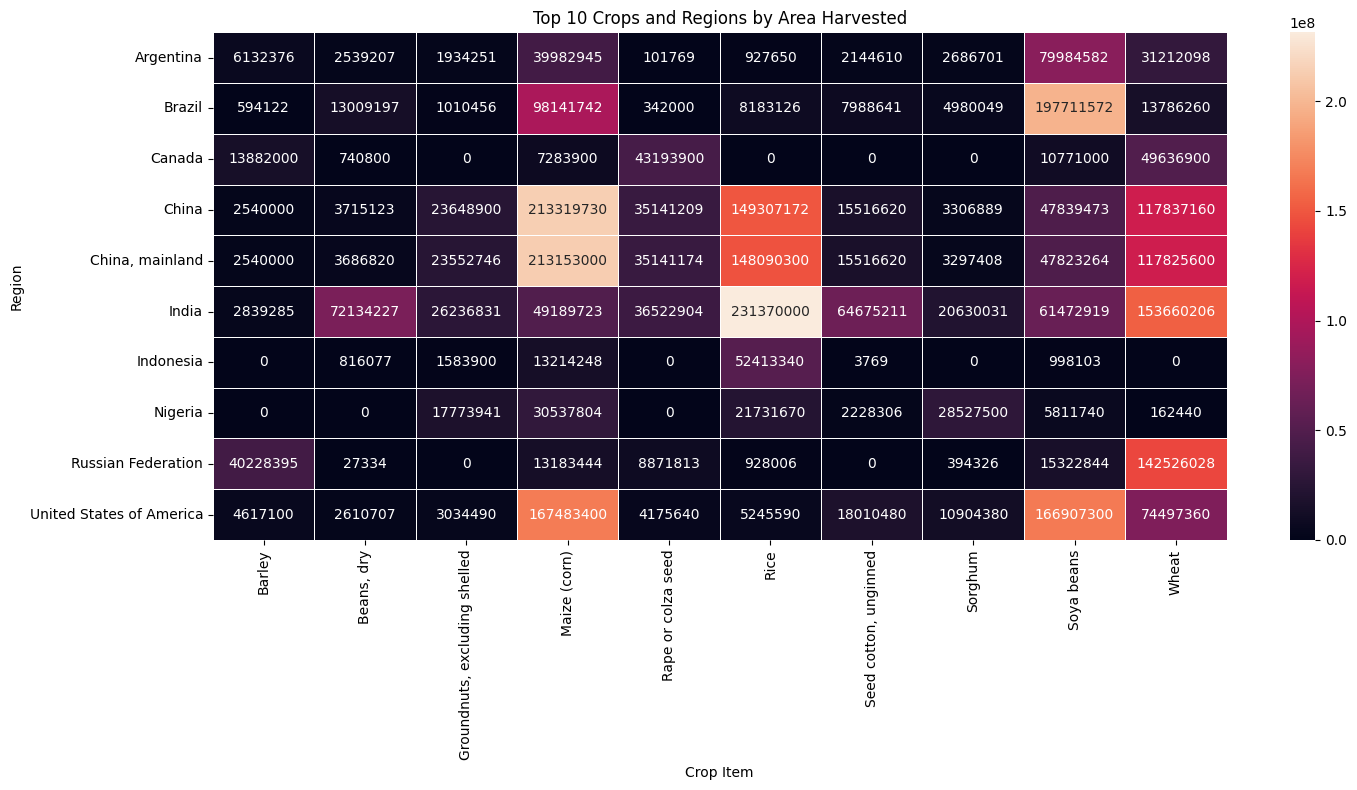

In [27]:
reg_crop=df[df['Element']=='Area harvested'].groupby(['Area','Item'])['Value'].sum().reset_index()
top_crops = reg_crop.groupby('Item')['Value'].sum().nlargest(10).index
top_areas = reg_crop.groupby('Area')['Value'].sum().nlargest(10).index
filtered = reg_crop[reg_crop['Item'].isin(top_crops) & reg_crop['Area'].isin(top_areas)]
pivot_filtered = filtered.pivot(index='Area', columns='Item', values='Value').fillna(0)
plt.figure(figsize=(15,8))
sns.heatmap(pivot_filtered, linewidths=0.5, annot=True, fmt='.0f')
plt.title('Top 10 Crops and Regions by Area Harvested')
plt.xlabel('Crop Item')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


2.Temporal Analysis:

Yearly Trends: Analyze the Year column to detect trends in Area harvested, Yield, and Production over time.


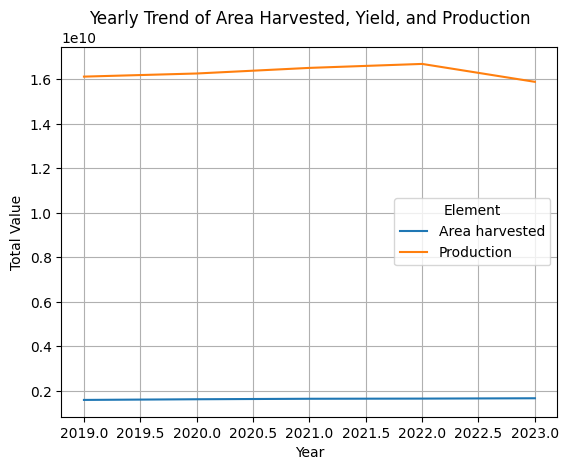

In [28]:
yearly_trend=df[df['Element'].isin(['Area harvested','yeild','Production'])].groupby(['Year','Element'])['Value'].sum().reset_index()
sns.lineplot(data=yearly_trend,x='Year',y='Value',hue='Element',markers='o')
plt.title("Yearly Trend of Area Harvested, Yield, and Production")
plt.ylabel("Total Value")
plt.xlabel("Year")
plt.grid(True)
#plt.tight_layout()
plt.show()

Growth Analysis: 
Investigate if certain crops or regions show increasing or decreasing trends in yield or production.


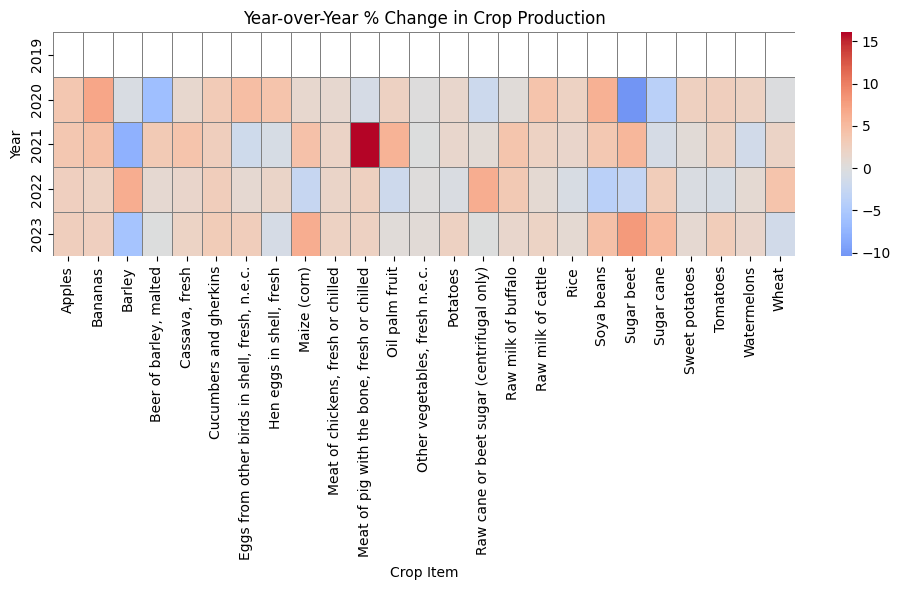

In [29]:
top_items = df[df['Element'] == 'Production'].groupby('Item')['Value'].sum().nlargest(25).index
filtered = df[(df['Element'] == 'Production') & (df['Item'].isin(top_items))]

trend_analysis = filtered.groupby(['Year', 'Item'])['Value'].sum().unstack().pct_change()*100
plt.figure(figsize=(10,6))
sns.heatmap(data=trend_analysis,cmap='coolwarm', center=0, linewidths=0.5, linecolor='gray')
plt.title("Year-over-Year % Change in Crop Production")
plt.xlabel("Crop Item")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

3.Environmental Relationships:

Although explicit environmental data is absent, infer relationships between the Area harvested and Yield to check if there’s an impact of resource utilization on crop productivity.

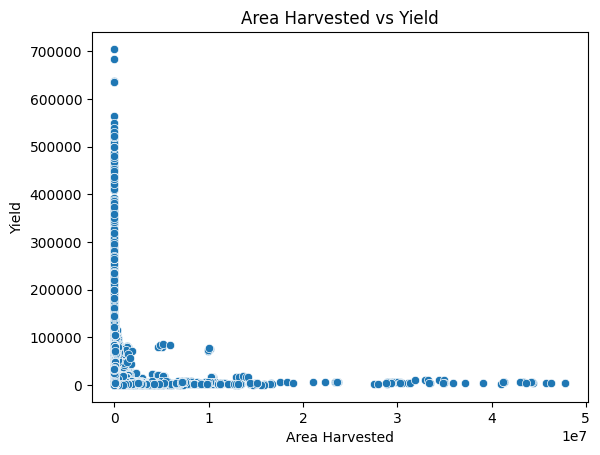

In [30]:
area_yeild=df[df["Element"].isin(['Area harvested', 'Yield'])]
pivort=area_yeild.pivot_table(index=['Area','Item','Year'],columns='Element',values='Value').reset_index()
sns.scatterplot(data=pivort,x='Area harvested', y='Yield')
plt.title('Area Harvested vs Yield')
plt.xlabel('Area Harvested')
plt.ylabel('Yield')
plt.show()

4.Input-Output Relationships:

Study correlations between Area harvested, Yield, and Production to understand the relationship between land usage and productivity.


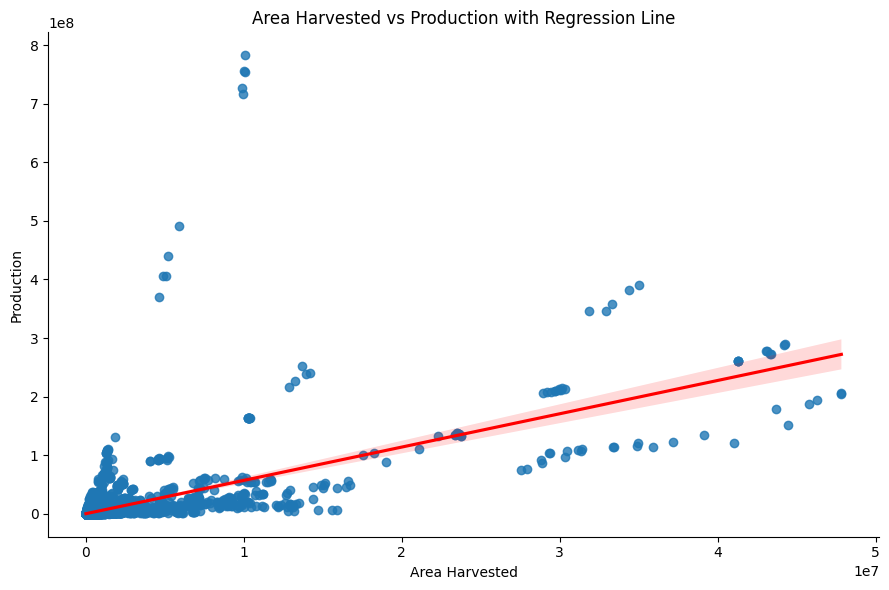

In [31]:
io_relation = df[df['Element'].isin(['Area harvested', 'Production'])].pivot_table(index=['Area', 'Item', 'Year'], columns='Element', values='Value').reset_index()
io_relation['Productivity'] = io_relation['Production'] / io_relation['Area harvested']
sns.lmplot(data=io_relation, x='Area harvested', y='Production', height=6, aspect=1.5, line_kws={'color': 'red'})
plt.title('Area Harvested vs Production with Regression Line')
plt.xlabel('Area Harvested')
plt.ylabel('Production')
plt.tight_layout()
plt.show()

6.Comparative Analysis:

Across Crops: Compare yields (Yield) of different crops (Item) to identify high-yield vs. low-yield crops.

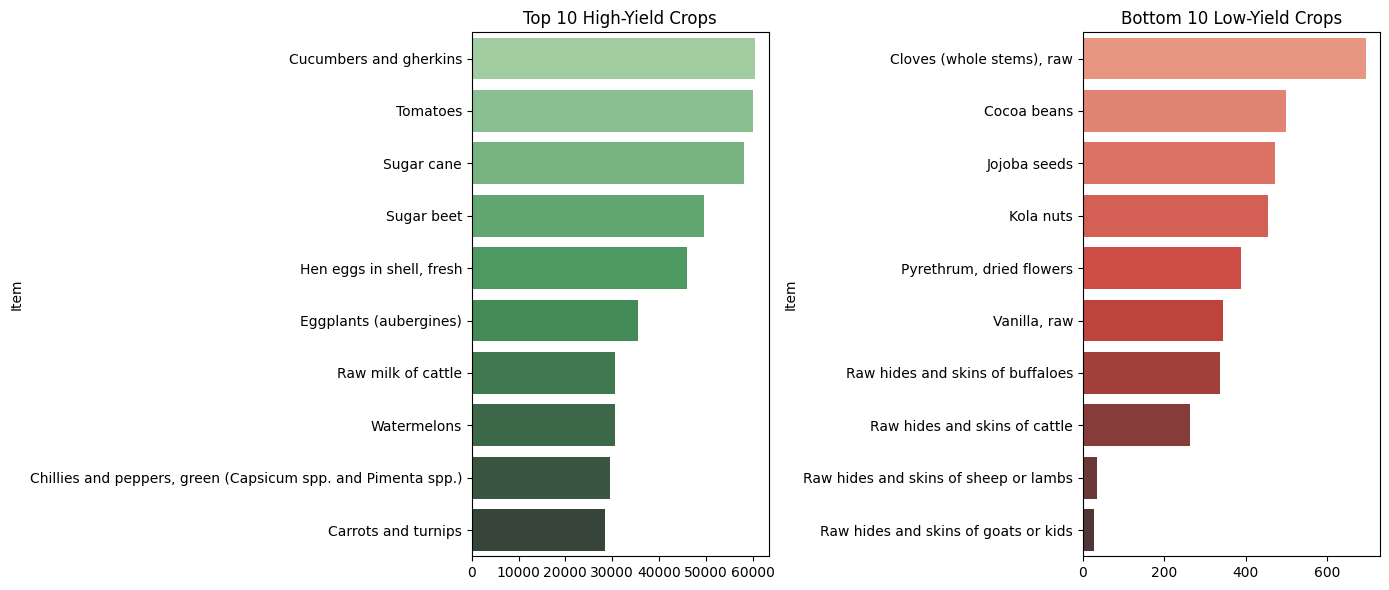

In [32]:
yield_crops=df[df['Element']=='Yield'].groupby('Item')['Value'].mean().sort_values(ascending=False)
top10=yield_crops.head(10)
low10=yield_crops.tail(10)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=top10.values, y=top10.index, ax=ax[0], palette="Greens_d")
ax[0].set_title("Top 10 High-Yield Crops")
sns.barplot(x=low10.values, y=low10.index, ax=ax[1], palette="Reds_d")
ax[1].set_title("Bottom 10 Low-Yield Crops")
plt.tight_layout()
plt.show()

Across Regions: 

Compare production (Production) across different areas (Area) to find highly productive regions.


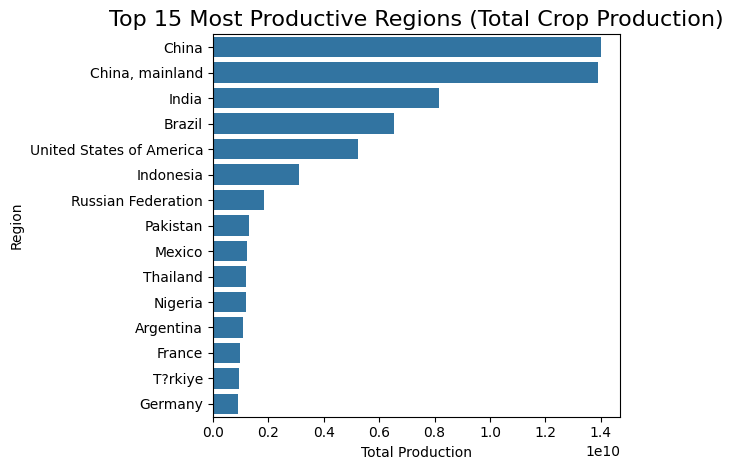

In [33]:
across_region=df[df["Element"]=='Production'].groupby("Area")['Value'].sum().sort_values(ascending=False).head(15)
sns.barplot(x=across_region.values,y=across_region.index)
plt.title('Top 15 Most Productive Regions (Total Crop Production)', fontsize=16)
plt.xlabel('Total Production')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

Productivity Analysis:

Examine variations in Yield to identify efficient crops and regions.

Calculate productivity ratios: Production/Area harvested to cross-verify yields.


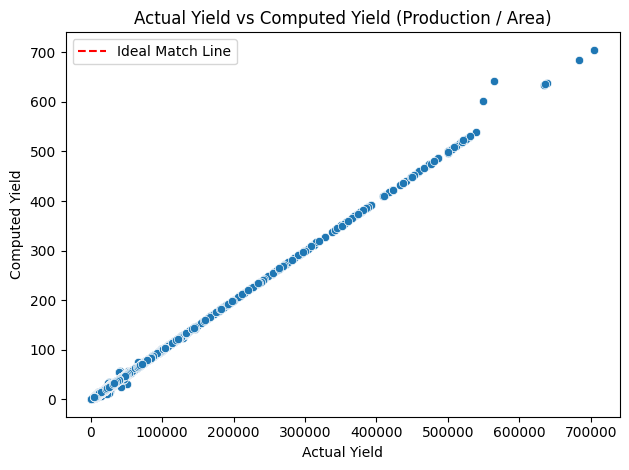

In [34]:

yield_compare = df[df["Element"].isin(['Area harvested','Production','Yield'])]
pivot = yield_compare.pivot_table(index=['Area','Item','Year'], columns='Element', values='Value').reset_index()
pivot['Computed_Yield'] = pivot['Production'] / pivot['Area harvested']

sns.scatterplot(data=pivot, x='Yield', y='Computed_Yield')
plt.plot([0, pivot[['Yield', 'Computed_Yield']].max().max()], 
         [0, pivot[['Yield', 'Computed_Yield']].max().max()], 
         color='red', linestyle='--', label='Ideal Match Line')
plt.title('Actual Yield vs Computed Yield (Production / Area)')
plt.xlabel('Actual Yield')
plt.ylabel('Computed Yield')
plt.legend()
plt.tight_layout()
plt.show()



6.Outliers and Anomalies:

Identify anomalies in Yield or Production, such as unusually high or low values, and correlate them with potential external factors like policies or environmental changes.


<Axes: xlabel='Element', ylabel='Value'>

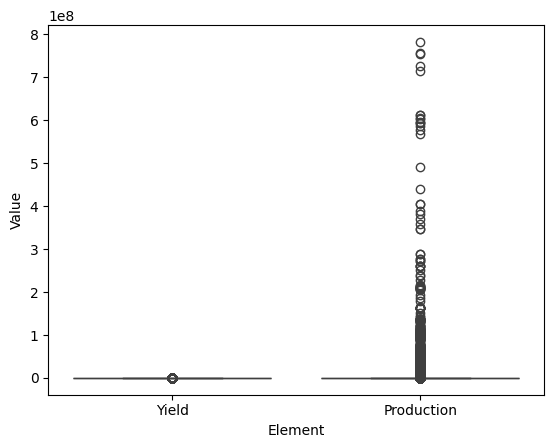

In [35]:
sns.boxplot(x='Element', y='Value', data=df[df['Element'].isin(['Yield', 'Production'])])


Machine Learning:

In [36]:
# Filter the data for relevant elements (Area harvested and Yield)
df_area = df[df['Element'] == 'Area harvested'][['Area', 'Item', 'Year', 'Value']].rename(columns={'Value': 'Area_ha'})
df_yield = df[df['Element'] == 'Yield'][['Area', 'Item', 'Year', 'Value']].rename(columns={'Value': 'Yield_kg_per_ha'})

# Merge the two dataframes by 'Area', 'Item', and 'Year'
df_cp = pd.merge(df_area, df_yield, on=['Area', 'Item', 'Year'])

# Calculate the estimated production in tons
df_cp['Estimated_Production_tons'] = (df_cp['Area_ha'] * df_cp['Yield_kg_per_ha']) / 1000
df_cp


,Area,Item,Year,Area_ha,Yield_kg_per_ha,Estimated_Production_tons
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38206.2849
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.7706
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64257.8384
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63516.8040
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,66999.6000
...,...,...,...,...,...,...
44976,Zimbabwe,Wheat,2019,24186.0,3914.9,94685.7714
44977,Zimbabwe,Wheat,2020,44466.0,4779.6,212529.6936
44978,Zimbabwe,Wheat,2021,66434.0,5075.9,337212.3406
44979,Zimbabwe,Wheat,2022,48504.0,5154.2,249999.3168


In [37]:
df_cp['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "C?te d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eston

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
X=df_cp[['Area_ha','Yield_kg_per_ha']]
y=df_cp['Estimated_Production_tons']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
poly=PolynomialFeatures(degree=2,include_bias=True)
X_ptrain=poly.fit_transform(X_train)
X_ptest=poly.transform(X_test)
reg=LinearRegression()
reg.fit(X_ptrain,y_train)
y_pred=reg.predict(X_ptest)
score=r2_score(y_test,y_pred)
print("r2_score=",score)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

print("mean_squared_error =",mse)
print("mean_absolute_error = ",mae)
print("root_mean_squared_error = ",rmse)

r2_score= 1.0
mean_squared_error = 1.6861157611305872e-15
mean_absolute_error =  1.204159698953004e-08
root_mean_squared_error =  4.1062339937351196e-08


In [39]:
y_train_pred = reg.predict(X_ptrain)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2,train_mse

(1.0, 1.7518942079723437e-15)